# Modellieren echter Daten

Es soll die Reatkion :

butanal <--> butyroin <--> buteraldehyd 

modelliert werden

Der Gesamtverlauf sieht dabei so aus:

   T [min]     Butanal   butyroin  4,5-octanediol
0        0  235.403070   0.000000             0.0
1       15  136.667003  35.135764             0.0
2       30   78.775571  59.773672             0.0
3       60   39.501736  80.610846             0.0
4      140   15.373700  85.416647             0.0


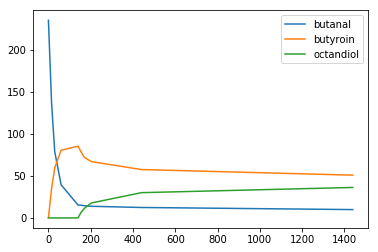

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel(r"4,5-ODO Upscaling.xlsx")
print(df.head())

time = df["T [min]"]
butanal = df["Butanal"]
butyroin = df["butyroin"]
octandiol = df["4,5-octanediol"]

fig,ax = plt.subplots()

ax.plot(time, butanal, label = "butanal")
ax.plot(time, butyroin, label = "butyroin")
ax.plot(time, octandiol, label = "octandiol")
plt.legend()
plt.show()



# Schritt 1: Modellieren des Substratverlaufs

[[240.        ]
 [115.39234415]
 [ 75.96836553]
 [ 45.15540862]
 [ 21.76700349]
 [ 19.85514362]
 [ 18.25713069]
 [ 15.52533465]
 [  7.68686215]
 [  3.33601707]]


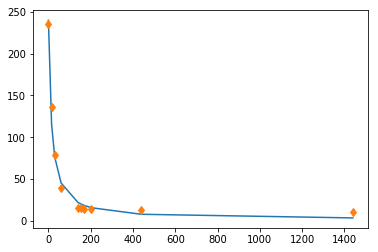

In [2]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import lmfit


time = df["T [min]"]
concentration_A0 = 240

def substrate_curve(A, t, k1, k2):
    dAdt = -k1*A**2 + k2*((concentration_A0-A)*0.5)
    return dAdt

solver_substrat = odeint(substrate_curve, concentration_A0, time, args=(0.0003,0.00002))
print(solver_substrat)

fig, ax = plt.subplots()

ax.plot(time,solver_substrat)
ax.plot(time,butanal, linestyle ="", marker = "d")

#plt.show()



# Einbinden des Ersten Produkts

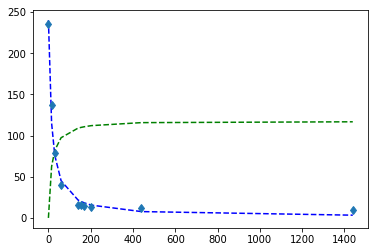

In [7]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import lmfit


time = df["T [min]"]

inital_conditions = [240,0]

concentration_A0 = 240
concentration_B0 = 0

def substrate_curve(init_cond, t, k1, k2):
    A = init_cond[0]
    B = init_cond[1]

    dAdt = -k1*A**2 + k2*B
    dBdt = k1*A**20.5 -k2*B
    dZdt = np.array([dAdt,dBdt])
    return dZdt

solver_substrat = odeint(substrate_curve, inital_conditions, time, args=(0.0003,0.00002))
#print(solver_substrat)

fig, ax = plt.subplots()

ax.plot(time,solver_substrat[:,0], linestyle="--", color="blue")
ax.plot(time,solver_substrat[:,1], linestyle="--", color="green")

ax.plot(time,butanal, linestyle ="", marker = "d")

#plt.show()


# Einbinden des Zweiten produkts

0.0
0.0
1.7245732492873803e-12
3.449139335281839e-12
5.173709002937437e-12
1.6723584504260742e-07
1.671604048751826e-07
6.656021661793499e-07
6.654513865242471e-07
1.4947275902054294e-06
1.4945770116190684e-06
1.1856390481259557e-05
1.1854551525662499e-05
7.459871644032933e-06
7.459016103574524e-06
2.3237730774421463e-06
2.323738584308103e-06
3.334830493974359e-06
3.3348651090548026e-06
4.527840750879716e-06
4.527840798629771e-06
5.902543064045394e-06
5.902543114569214e-06
9.19663755652842e-06
9.196637798693708e-06
1.3216170926899405e-05
1.321617080388232e-05
1.7960165872757272e-05
1.79601657494957e-05
2.3427648140738316e-05
2.342764813887226e-05
2.9617645411329244e-05
2.9617645409415407e-05
0.0001310433399009203
0.00013104333475881354
0.0003036647737543663
0.000303664763706992
0.0005465402601125065
0.0005465402797762438
0.0008587463572731454
0.000858746366410712
0.0012393771732361301
0.001239377178569503
0.0016875440866850207
0.0016875440918015057
0.00338808120236053
0.003388081445172

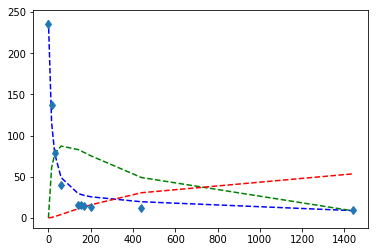

In [36]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import lmfit


time = df["T [min]"]

inital_conditions = [240,0,0]

concentration_A0 = 240
concentration_B0 = 0

def substrate_curve(init_cond, t, k1, k2, k3, k4):
    A = init_cond[0]
    B = init_cond[1]
    C= init_cond[2]

    dAdt = -k1*A**2 + k2*B
    dBdt = k1*A**2*0.5 - (k2+k3)*B
    dCdt = k3*B
    print(C)

    dZdt = np.array([dAdt,dBdt, dCdt])
    return dZdt

solver_substrat = odeint(substrate_curve, inital_conditions, time, args=(0.0003,0.002, 0.001, 0.2))
#print(solver_substrat)

fig, ax = plt.subplots()

ax.plot(time,solver_substrat[:,0], linestyle="--", color="blue")
ax.plot(time,solver_substrat[:,1], linestyle="--", color="green")
ax.plot(time,solver_substrat[:,2], linestyle="--", color="red")

ax.plot(time,butanal, linestyle ="", marker = "d")

#plt.show()